In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
img= cv2.imread('/content/gdrive/My Drive/Colab IP/Images/Lena-Gaussian-noise1.jpg')

In [5]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kernel = np.ones((3, 3), np.float32) / 9
output_img=cv2.filter2D(gray_img,-1,kernel)

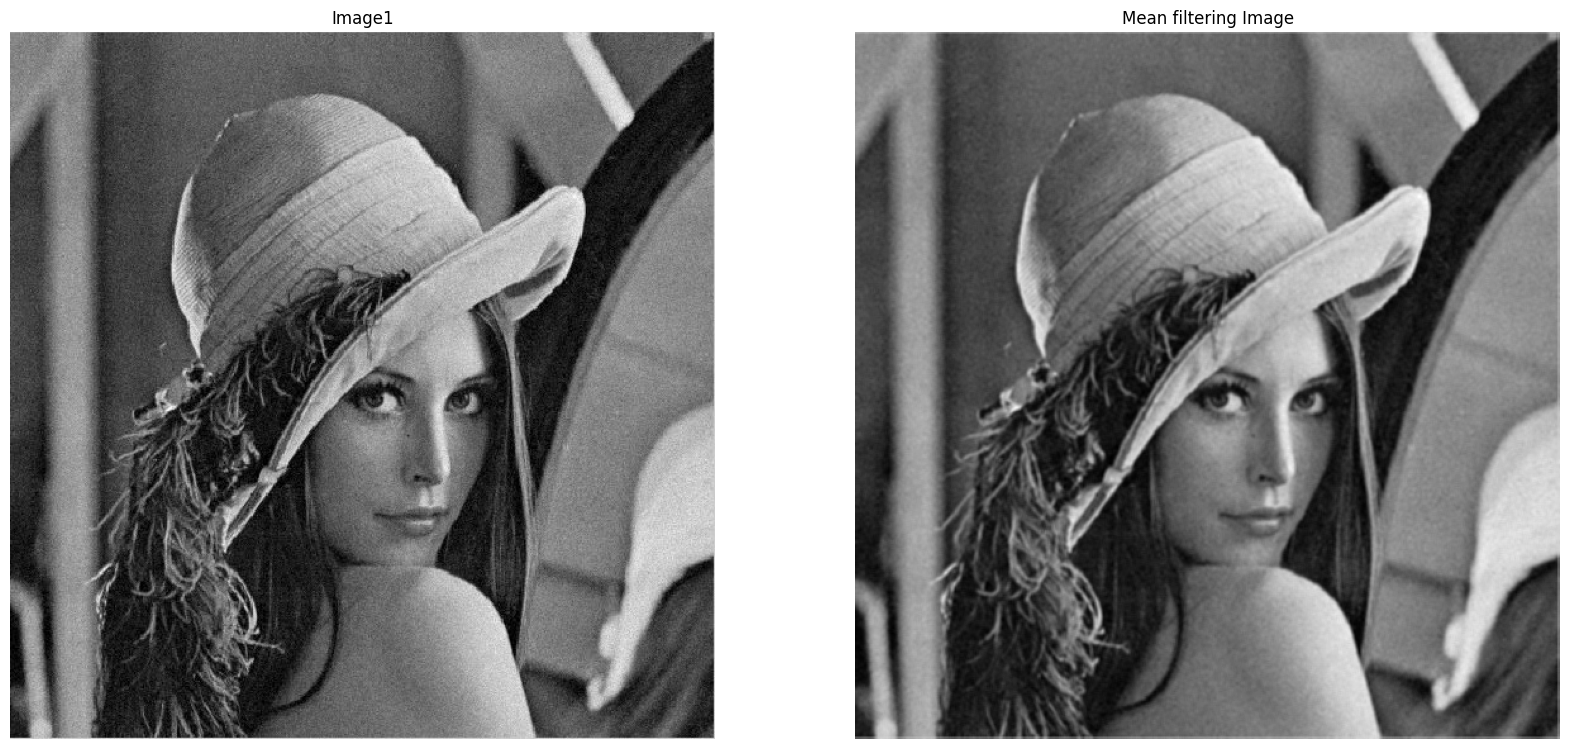

In [6]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title('Image1')
plt.imshow(gray_img,cmap='gray')
plt.axis("off")
plt.subplot(1,2,2)
plt.title('Mean filtering Image')
plt.imshow(output_img,cmap='gray')
plt.axis("off")
plt.show()

In [7]:
img= cv2.imread('/content/gdrive/My Drive/Colab IP/Images/Lena-Gaussian-noise1.jpg')

In [9]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
output_img=np.zeros((img.shape[0],img.shape[1]))
center=0
current=0
min=255;
max=0;
ed=1

In [10]:
for h in range(ed, img.shape[0]-ed,1):
  for w in range(ed, img.shape[1]-ed,1):
    center = gray_img[h,w]
    min = gray_img[h-ed, w-ed]
    max = gray_img[h-ed, w-ed]

In [11]:
for m in range(-ed,ed,1):
  for n in range(-ed,ed,1):
    if(m==0 and n==0):
      continue
    else:
      current = gray_img[h+m,w+m]
    if (min > current):
      min=current
    if (max < current):
      max=current
if (center> min and center < max):
  output_img[h,w]=center
elif (center > max):
  center = max
elif (center < min):
  center = min
output_img[h,w] = center

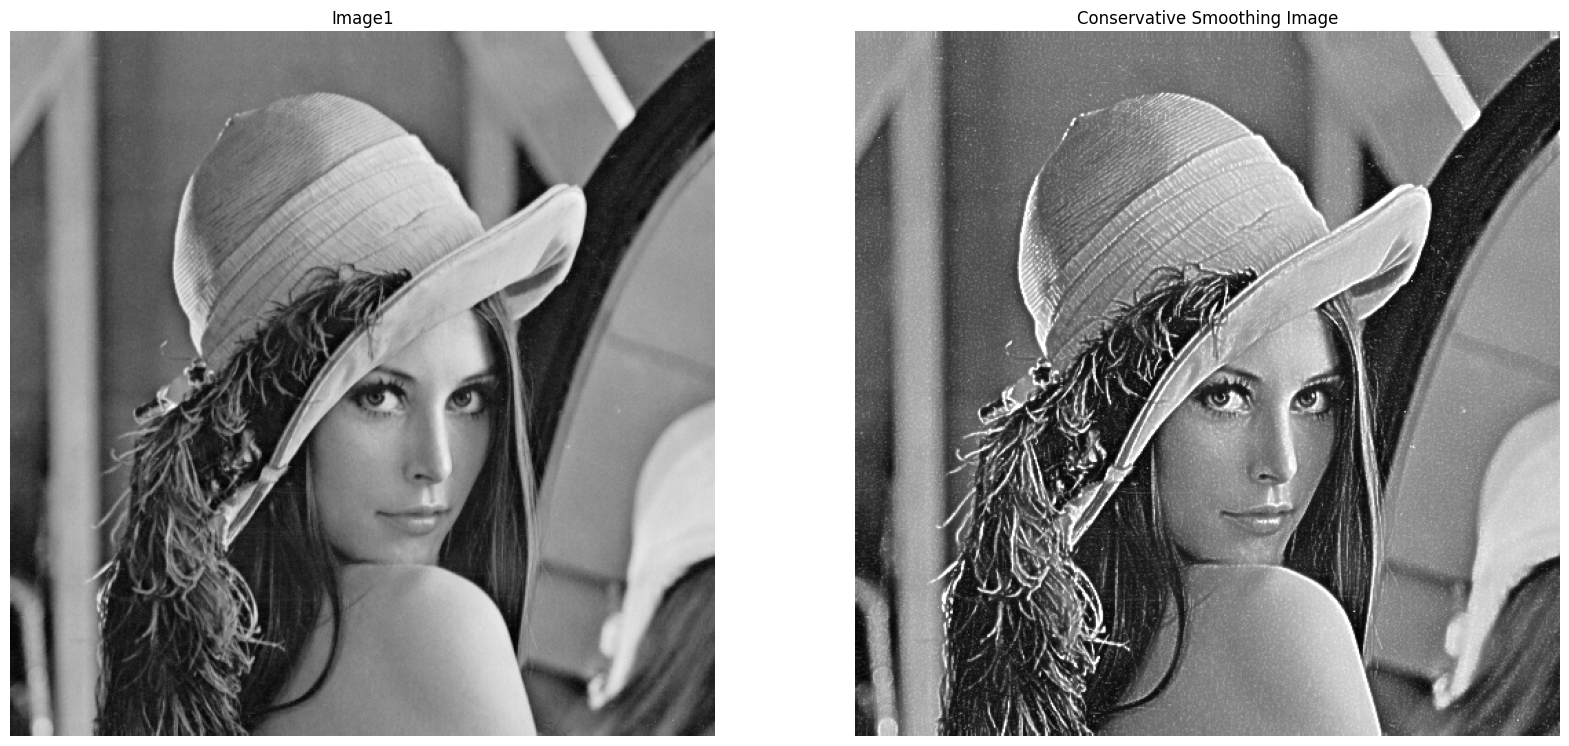

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title('Image1')
plt.imshow(gray_img,cmap='gray')
plt.axis("off")
plt.subplot(1,2,2)
plt.title('Conservative Smoothing Image')
plt.imshow(output_img,cmap='gray')
plt.axis("off")
plt.show()

In [13]:
img= cv2.imread('/content/gdrive/My Drive/Colab IP/Images/lena.jpg')

In [14]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [16]:
mean_img = cv2.blur(gray_img,(5,5))
edge_img = cv2.addWeighted(gray_img,1.0 ,mean_img, -1.0, 0)
output_img = cv2.addWeighted(gray_img, 1.0 ,edge_img, 3.0, 0)

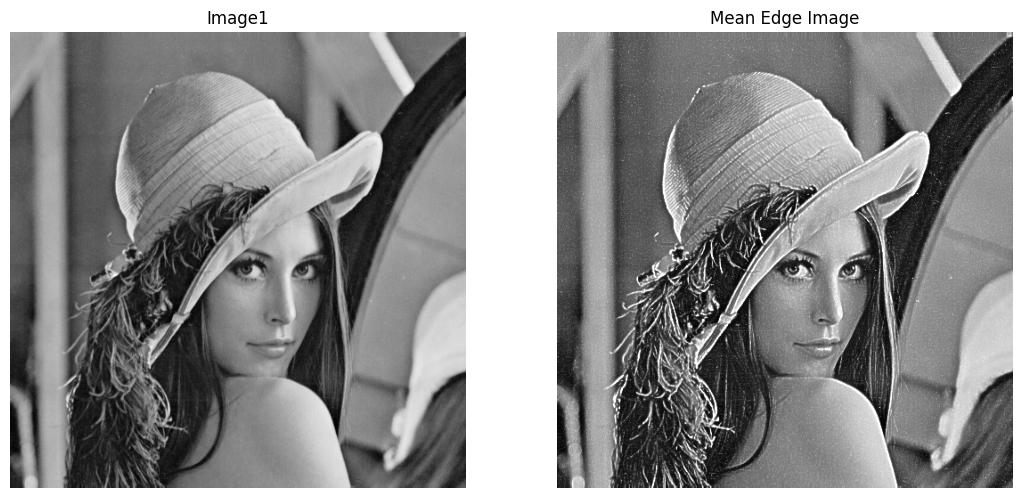

In [17]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title('Image1')
plt.imshow(gray_img,cmap='gray')
plt.axis("off")
plt.subplot(1,3,2)
plt.title('Mean Edge Image')
plt.imshow(output_img,cmap='gray')
plt.axis("off")
plt.show()